In [1]:
!apt-get update
!apt-get install poppler-utils
!pip install pdf2image
!pip install easyocr
!pip install opencv-python-headless

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [665 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,061 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,398 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,685 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu 

In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt install tesseract-ocr-rus

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (8,855 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [4]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
import pandas as pd
from pdf2image import convert_from_path
import easyocr
from PIL import Image

In [2]:
def get_rotation_angle(image):
    # Преобразование в градации серого и применение Canny edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Применение Hough Transform для нахождения линий
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

    # Вычисление углов каждой линии
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1) * 180. / np.pi
        angles.append(angle)

    # Вычисление среднего угла наклона
    median_angle = np.median(angles)
    return median_angle

def process_image(file_path):
    # Определение формата файла
    if file_path.lower().endswith('.pdf'):
        # Обработка PDF
        images = convert_from_path(file_path)
        image = cv2.cvtColor(np.array(images[0]), cv2.COLOR_RGB2BGR)  # обработка первой страницы
    else:
        # Обработка изображений в формате JPG
        image = cv2.imread(file_path)

   # Получение угла наклона
    angle = get_rotation_angle(image)

    # Поворот изображения
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    # Вывод или сохранение результатов
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    plt.show()

    return rotated

In [6]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
import pandas as pd
from pdf2image import convert_from_path

pytesseract.pytesseract.tesseract_cmd = r'c:\Program Files\Tesseract-OCR\tesseract.exe' 

def get_rotation_angle(image):
    # Преобразование в градации серого и применение Canny edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Применение Hough Transform для нахождения линий
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

    # Вычисление углов каждой линии
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1) * 180. / np.pi
        angles.append(angle)

    # Вычисление среднего угла наклона
    median_angle = np.median(angles)
    return median_angle

def process_image(file_path):
    # Определение формата файла
    if file_path.lower().endswith('.pdf'):
        # Обработка PDF
        images = convert_from_path(file_path, poppler_path=r"c:\poppler-23.11.0\Library\bin")
        image = cv2.cvtColor(np.array(images[0]), cv2.COLOR_RGB2BGR)  # обработка первой страницы
    else:
        # Обработка изображений в формате JPG
        image = cv2.imread(file_path)
   
   # Получение угла наклона
    angle = get_rotation_angle(image)

    # Поворот изображения
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    # Вывод или сохранение результатов
    ##plt.figure(figsize=(10, 10))
    #plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    #plt.show()

    return rotated


In [9]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
import pandas as pd
from pdf2image import convert_from_path

pytesseract.pytesseract.tesseract_cmd = r'c:\Program Files\Tesseract-OCR\tesseract.exe' 

def get_rotation_angle(image):
    # Преобразование в градации серого и применение Canny edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Применение Hough Transform для нахождения линий
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

    # Вычисление углов каждой линии
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1) * 180. / np.pi
        angles.append(angle)

    # Вычисление среднего угла наклона
    median_angle = np.median(angles)
    return median_angle

def process_image(file_path):
    # Определение формата файла
    if file_path.lower().endswith('.pdf'):
        # Обработка PDF
        images = convert_from_path(file_path, poppler_path=r"c:\poppler-23.11.0\Library\bin")
        image = cv2.cvtColor(np.array(images[0]), cv2.COLOR_RGB2BGR)  # обработка первой страницы
    else:
        # Обработка изображений в формате JPG
        image = cv2.imread(file_path)
   
   # Получение угла наклона
    angle = get_rotation_angle(image)

    # Поворот изображения
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    # Вывод или сохранение результатов
    ##plt.figure(figsize=(10, 10))
    #plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    #plt.show()

    return rotated


In [10]:
process_image(r'data\3_358377_договор_ЛС_278015829073_Петербургский_ф.pdf')

PDFPageCountError: Unable to get page count.
I/O Error: Couldn't open file 'data\3_358377_<d0><b4><d0><be><d0><b3><d0><be><d0><b2><d0><be><d1><80>_<d0><9b><d0><a1>_278015829073_<d0><9f><d0><b5><d1><82><d0><b5><d1><80><d0><b1><d1><83><d1><80><d0><b3><d1><81><d0><ba><d0><b8><d0><b9>_<d1><84>.pdf': No error.


In [1]:
width_pixels = 1700
height_pixels = 2200

# Размеры бумаги A4 в дюймах
width_inches = 8.27
height_inches = 11.69

dpi_width = width_pixels / width_inches
dpi_height = height_pixels / height_inches

# Рассчитаем среднее значение DPI
average_dpi = (dpi_width + dpi_height) / 2

print(f"Среднее DPI: {average_dpi}")

Среднее DPI: 196.8786558856721


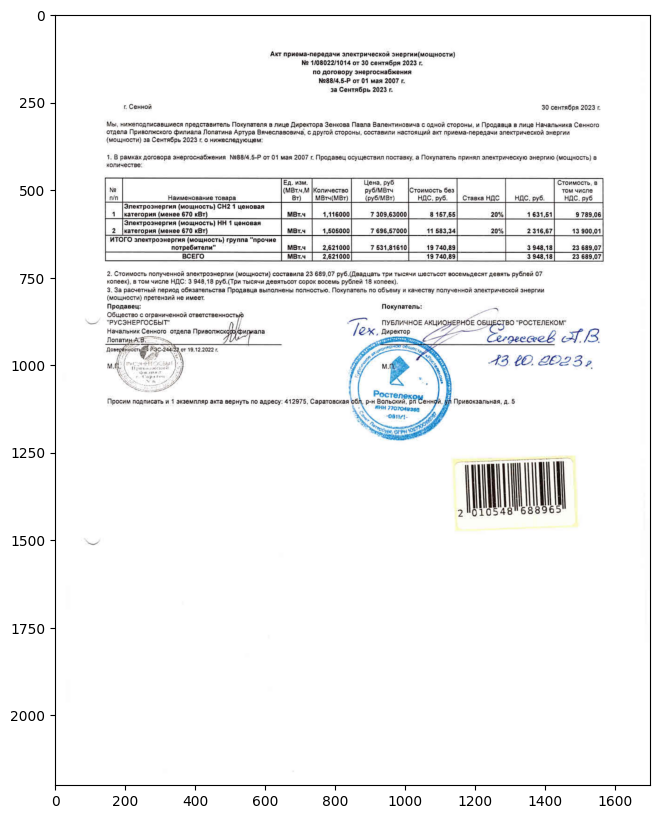

In [6]:
rotated = process_image('/content/Акт № 1_08022_1014 от 30.09.23.PDF')

In [7]:
gray_image= cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)

In [8]:
import easyocr
import numpy as np
import pandas as pd
reader = easyocr.Reader(['ru'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [9]:
# (1) thresholding image
ret,thresh_value = cv2.threshold(gray_image,180,255,cv2.THRESH_BINARY_INV)

# (2) dilating image to glue letter with e/a
kernel = np.ones((2,2),np.uint8)
dilated_value = cv2.dilate(thresh_value,kernel,iterations = 1)

# (3) looking for countours
contours, hierarchy = cv2.findContours(dilated_value,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# (4) extracting coordinates and filtering them empirically
coordinates_tables = []
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    if h>100 and w>600 and h*w<350000:
        coordinates_tables.append((x,y,w,h))

coordinates_tables

[(142, 464, 1427, 242)]

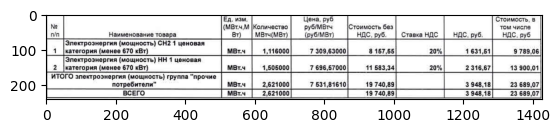

In [10]:
x, y, w, h = coordinates_tables[0]
crop_table = rotated[y:y+h, x:x+w]
plt.imshow(crop_table)

In [11]:
gray_crop_table= cv2.cvtColor(crop_table, cv2.COLOR_BGR2GRAY)
# (1) thresholding image
ret,thresh_value = cv2.threshold(gray_crop_table,180,255,cv2.THRESH_BINARY_INV)

# (2) dilating image to glue letter with e/a
kernel = np.ones((2,2),np.uint8)
dilated_value = cv2.dilate(thresh_value,kernel,iterations = 1)

# (3) looking for countours
contours, hierarchy = cv2.findContours(dilated_value,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# (4) extracting coordinates and filtering them empirically
coordinates_cell = []
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    if h>20 and w>30 and h*w<35000:
        coordinates_cell.append((x,y,w,h))

coordinates_cell.sort(key=lambda coord: (coord[1], coord[0]))

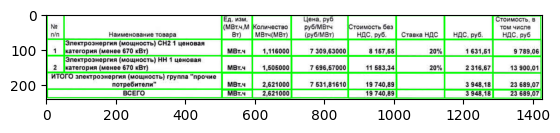

In [12]:
crop_table_viz = crop_table.copy()
for (x, y, w, h) in coordinates_cell:
    cv2.rectangle(crop_table_viz, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Отображение изображения
plt.imshow(crop_table_viz)

In [13]:
x, y, w, h = coordinates_cell[18]
crop_img = crop_table[y:y+h, x:x+w]

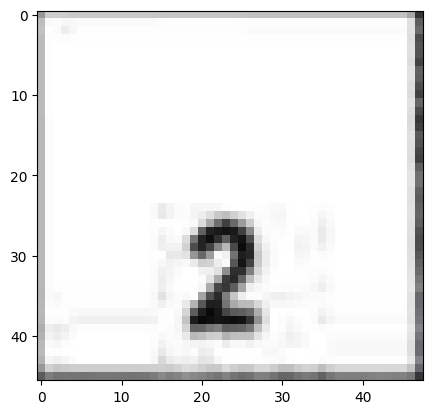

In [14]:
plt.imshow(crop_img)

In [15]:
easy = reader.readtext(crop_img)
print(easy)

[]


In [16]:
tesseract = pytesseract.image_to_string(crop_img, lang='rus', config='--psm 7').strip()
ocr_data = pytesseract.image_to_data(crop_img, lang='rus', output_type=pytesseract.Output.DICT)
print(tesseract, [conf for conf, text in zip(ocr_data['conf'], ocr_data['text']) if conf != -1 and text.strip()])
# print(ocr_data)

2 []


# EASTOCR text+recognition and TESSERACT only recognition

In [17]:
data = []

for coord in coordinates_cell:
    x, y, w, h = coord
    cropped_image = crop_table[y:y+h, x:x+w]

    # Применение EasyOCR
    easyocr_results = reader.readtext(cropped_image, detail=1)  # Получение bbox и текста

    for result in easyocr_results:
        bbox, text_easyocr, confidence_easyocr = result

        # Обрезка изображения по bbox от EasyOCR для Tesseract
        x_min, y_min, x_max, y_max = bbox[0][0], bbox[0][1], bbox[2][0], bbox[2][1]
        cropped_for_tesseract = cropped_image[y_min:y_max, x_min:x_max]

        # Применение Tesseract
        text_tesseract = pytesseract.image_to_string(cropped_for_tesseract, lang='rus').strip()

        # Получение уверенности для Tesseract
        confidences_tesseract = []
        data_tesseract = pytesseract.image_to_data(cropped_for_tesseract, lang='rus', output_type=pytesseract.Output.DICT)
        num_boxes = len(data_tesseract['text'])
        for i in range(num_boxes):
            if int(data_tesseract['conf'][i]) > 0:  # Фильтрация пустых bbox
                confidences_tesseract.append(int(data_tesseract['conf'][i]))

        confidence_tesseract = (np.mean(confidences_tesseract) / 100) if confidences_tesseract else 0

        # Сохранение результатов
        data.append({
            "text_easyocr": text_easyocr,
            "confidence_easyocr": confidence_easyocr,
            "text_tesseract": text_tesseract,
            "confidence_tesseract": confidence_tesseract
        })

# Создание DataFrame
df = pd.DataFrame(data)

In [18]:
df

,text_easyocr,confidence_easyocr,text_tesseract,confidence_tesseract
0,{₽,0.117880,№,0.960000
1,л/п,0.758943,п/п,0.630000
2,Наименование товара,0.956364,Наименование товара,0.960000
3,Ед,0.999988,,0.000000
4,изм:,0.386959,,0.000000
5,(МВтч М,0.905383,"(МВтч,М",0.500000
6,Вт),0.999638,Вт),0.950000
7,Количество,0.999835,Количество,0.950000
8,МВтч(МВт),0.870791,МВтч(МВт),0.760000
9,Цена руб,0.679943,"Цена, руб",0.955000


# EASTOCR text+recognition and TESSERACT text+recognition

In [19]:
data = []

# Обработка каждой ячейки
for coord in coordinates_cell:
    x, y, w, h = coord
    cropped_image = crop_table[y:y+h, x:x+w]

    # Применение EasyOCR
    easyocr_results = reader.readtext(cropped_image, detail=1)  # Получение bbox и текста
    text_easy = ' '.join([result[1] for result in easyocr_results])  # Объединение всех результатов в одну строку
    confidence_easy = [int(round(result[2]*100, 0)) for result in easyocr_results]

    # Получение уверенности для Tesseract
    ocr_data = pytesseract.image_to_data(cropped_image, lang='rus', output_type=pytesseract.Output.DICT)
    text_tesseract = ' '.join([text for text, conf in zip(ocr_data['text'], ocr_data['conf']) if int(conf) > 0 and text.strip()])
    confidence_tesseract = [conf for conf, text in zip(ocr_data['conf'], ocr_data['text']) if conf != -1 and text.strip()]
    #average_confidence_tesseract = np.mean(confidence_tesseract) if confidence_tesseract else 0
    #average_confidence_easyocr = np.mean(confidence_easy) if confidence_easy else 0

    # Сохранение результатов
    data.append({
        "bbox": coord,
        "text_easyocr": text_easy,
        "confidence_easyocr": confidence_easy,
        "text_tesseract": text_tesseract,
        "confidence_tesseract": confidence_tesseract,
    })

# Создание DataFrame
df = pd.DataFrame(data)

In [21]:
# Создание нового DataFrame
ocr_results = []

for index, row in df.iterrows():
    # Проверка минимального уровня уверенности для Tesseract
    bbox = row['bbox']
    if row['confidence_tesseract'] and min(row['confidence_tesseract']) > 50:
        text = row['text_tesseract']
        confidence = min(row['confidence_tesseract'])
    else:
        text = row['text_easyocr']
        confidence = min(row['confidence_easyocr']) if row['confidence_easyocr'] else None

    ocr_results.append({'bbox': bbox,'text': text, 'confidence': confidence})

ocr_results = pd.DataFrame(ocr_results)

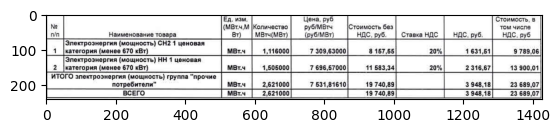

In [23]:
x, y, w, h = coordinates_tables[0]
crop_table = rotated[y:y+h, x:x+w]
plt.imshow(crop_table)

In [24]:
y_threshold = 10

# Группировка ячеек в строки
rows = []
current_row = [coordinates_cell[0]]

for i in range(1, len(coordinates_cell)):
    # Если разница в вертикальной координате меньше порога, то считаем ячейки частью одной строки
    if abs(coordinates_cell[i][1] - coordinates_cell[i - 1][1]) <= y_threshold:
        current_row.append(coordinates_cell[i])
    else:
        # Начало новой строки
        rows.append(current_row)
        current_row = [coordinates_cell[i]]

# Добавление последней строки
rows.append(current_row)

In [26]:
# Пройдемся по каждой группе (строке) и отсортируем ячейки по их горизонтальному положению (x)
sorted_rows = [sorted(row, key=lambda coord: coord[0]) for row in rows]

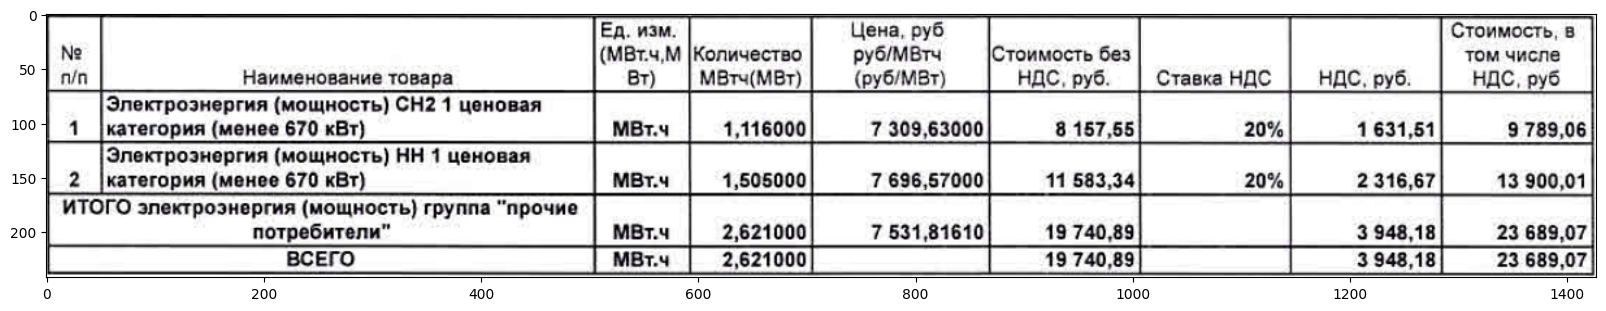

In [28]:
plt.figure(figsize=(20, 20))
x, y, w, h = coordinates_tables[0]
crop_table = rotated[y:y+h, x:x+w]
plt.imshow(crop_table)

In [30]:
# Преобразование OCR результатов в словарь
ocr_dict = {bbox: (text, confidence) for bbox, text, confidence in ocr_results.itertuples(index=False)}

# Финальный DataFrame
final_data = []

# Обход каждой строки
for row in sorted_rows:
    row_data = []
    for cell in row:
        # Используем координаты для получения текста и уверенности из OCR результатов
        text, confidence = ocr_dict.get((cell[0], cell[1], cell[2], cell[3]), ('', None))
        row_data.append(text)

    final_data.append(row_data)

# Создание DataFrame
final_df = pd.DataFrame(final_data)

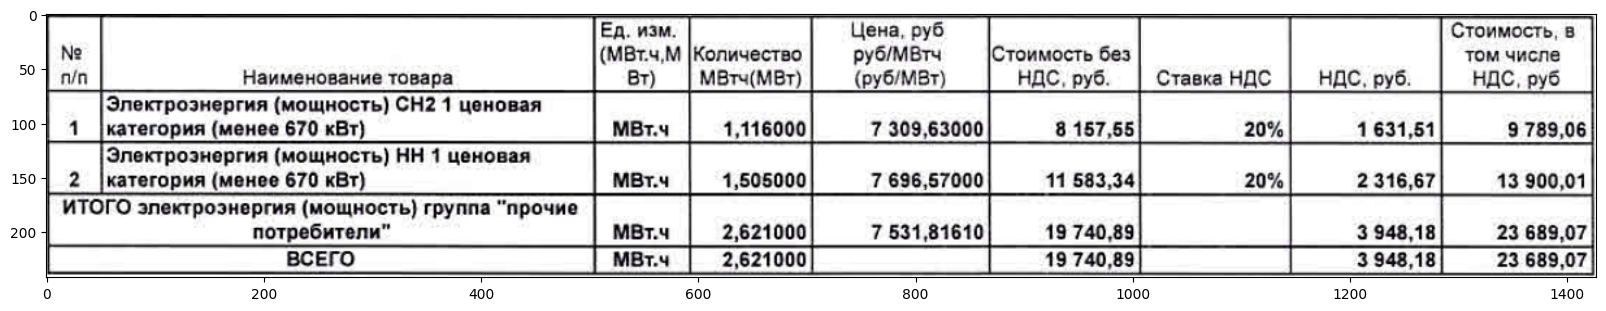

In [31]:
plt.figure(figsize=(20, 20))
x, y, w, h = coordinates_tables[0]
crop_table = rotated[y:y+h, x:x+w]
plt.imshow(crop_table)

In [32]:
final_df

,0,1,2,3,4,5,6,7,8
0,№ п/п,Наименование товара,"Ед. изм. (МВтч,М Вт)",Количество МВтч(МВт),"Цена, руб руб/МВтч (руб/МВт)","Стоимость без НДС, руб:",Ставка НДС,"НДС, руб.","Стоимость, в | том числе НДС, руб"
1,,Электроэнергия (мощность) СН2 1 ценовая катего...,МВт.ч,"1,116000","7 309,63000","8 157,55",20%,"1 631,51","9789,06"
2,,Электроэноргия (мощность) НН 1 ценовая категор...,МВт.ч,"1,505000","7 696,57000","11 583,34",20%,"2316,67","13 900,01"
3,ИТОГО зпектроэнергия (мощность) группа 'прочие...,МВт:ч,"2,621000","| 7 531,81610","19 740,89",,"3 948,18","23 689,07",None
4,ВСЕГО,МВт:ч,"2,621000",,"19 740,89",,"3948,18","23 689,07",None


In [33]:
ocr_results

,bbox,text,confidence
0,"(3, 3, 48, 68)",№ п/п,83.0
1,"(52, 3, 452, 68)",Наименование товара,96.0
2,"(506, 4, 86, 67)","Ед. изм. (МВтч,М Вт)",70.0
3,"(594, 4, 110, 67)",Количество МВтч(МВт),87.0
4,"(706, 4, 162, 67)","Цена, руб руб/МВтч (руб/МВт)",90.0
5,"(869, 4, 137, 67)","Стоимость без НДС, руб:",30.0
6,"(1008, 4, 137, 67)",Ставка НДС,95.0
7,"(1147, 4, 137, 67)","НДС, руб.",91.0
8,"(1286, 5, 137, 67)","Стоимость, в | том числе НДС, руб",84.0
9,"(3, 72, 48, 45)",,NaN


In [34]:
# Предполагаемая ширина одного столбца
standard_column_width = 50

# Обработка данных
table_data = []

# Итерация по строкам DataFrame
for index, row in ocr_results.iterrows():
    bbox = row['bbox']  # Предполагается, что 'bbox' в формате строки, содержащей кортеж
    text = row['text']
    width = bbox[2]

    # Проверка, занимает ли ячейка более одного столбца
    if width > standard_column_width +5:
        # Ячейка занимает более одного столбца
        table_data.append([text, ""])
    else:
        # Ячейка занимает один столбец
        table_data.append([text])

# Создание DataFrame
df = pd.DataFrame(table_data, columns=["Столбец 1", "Столбец 2"])

In [35]:
# Функция для объединения близких значений
def cluster_values(values, threshold):
    clusters = []
    temp_cluster = [values[0]]
    for value in sorted(values)[1:]:
        if value - temp_cluster[-1] <= threshold:
            temp_cluster.append(value)
        else:
            clusters.append(temp_cluster)
            temp_cluster = [value]
    clusters.append(temp_cluster)
    return [min(cluster) for cluster in clusters]  # Возвращаем минимальное значение из каждого кластера

# Определение количества строк и столбцов с учетом погрешности
threshold_y = 10  # Порог для строк
threshold_x = 10  # Порог для столбцов
unique_y = cluster_values(sorted(set([bbox[1] for bbox in coordinates_cell])), threshold_y)
unique_x = cluster_values(sorted(set([bbox[0] for bbox in coordinates_cell])), threshold_x)

num_rows = len(unique_y)
num_columns = len(unique_x)

# Создание пустого DataFrame
df = pd.DataFrame(index=range(num_rows), columns=range(num_columns))

# Функция для определения позиции ячейки
def find_position(bbox):
    row = unique_y.index(min(unique_y, key=lambda y: abs(y - bbox[1])))
    column = unique_x.index(min(unique_x, key=lambda x: abs(x - bbox[0])))
    return row, column

# Распределение данных по ячейкам
for bbox in coordinates_cell:
    row, column = find_position(bbox)
    df.at[row, column] = "Текст ячейки" # Замените на соответствующий текст


In [36]:
for index, row in ocr_results.iterrows():
    bbox = row['bbox']
    text = row['text']
    positions = find_position(bbox)
    row_pos, col_pos = positions
    df.at[row_pos, col_pos] = text

In [37]:
def fill_merged_cells(df):
    for row in range(df.shape[0]):
        for col in range(df.shape[1]):
            # Проверяем, является ли текущая ячейка NaN
            if pd.isna(df.iloc[row, col]):
                # Проверяем левую ячейку (если это не первый столбец)
                if col > 0 and not pd.isna(df.iloc[row, col - 1]):
                    df.iloc[row, col] = df.iloc[row, col - 1]
                # Проверяем верхнюю ячейку (если это не первая строка)
                elif row > 0 and not pd.isna(df.iloc[row - 1, col]):
                    df.iloc[row, col] = df.iloc[row - 1, col]

# Пример использования
# Предположим, у вас есть DataFrame df с NaN значениями
fill_merged_cells(df)

In [38]:
df

,0,1,2,3,4,5,6,7,8
0,№ п/п,Наименование товара,"Ед. изм. (МВтч,М Вт)",Количество МВтч(МВт),"Цена, руб руб/МВтч (руб/МВт)","Стоимость без НДС, руб:",Ставка НДС,"НДС, руб.","Стоимость, в | том числе НДС, руб"
1,,Электроэнергия (мощность) СН2 1 ценовая катего...,МВт.ч,"1,116000","7 309,63000","8 157,55",20%,"1 631,51","9789,06"
2,,Электроэноргия (мощность) НН 1 ценовая категор...,МВт.ч,"1,505000","7 696,57000","11 583,34",20%,"2316,67","13 900,01"
3,ИТОГО зпектроэнергия (мощность) группа 'прочие...,ИТОГО зпектроэнергия (мощность) группа 'прочие...,МВт:ч,"2,621000","| 7 531,81610","19 740,89",,"3 948,18","23 689,07"
4,ВСЕГО,ВСЕГО,МВт:ч,"2,621000",,"19 740,89",,"3948,18","23 689,07"


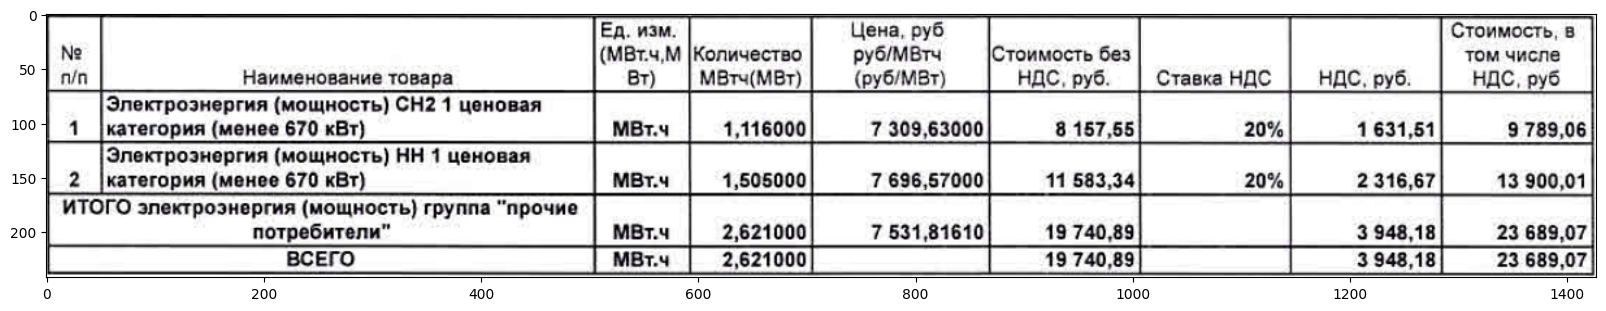

In [39]:
plt.figure(figsize=(20, 20))
x, y, w, h = coordinates_tables[0]
crop_table = rotated[y:y+h, x:x+w]
plt.imshow(crop_table)